In [35]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

## Read in the data as a DataFrame using Pandas

In [2]:
df = pd.read_excel('../data/Combined EMS_Solcast data.xlsx', skiprows=[1]) # Read excel file as a DataFrame and skip row index 1 (the units)

In [3]:
df.head(5) # Displays the first 5 rows of the DataFrame

,Date,Time,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,...,Fac,PrealL1,PrealL2,PrealL3,EMS_total_load,Pbat,SoC,Batv,Batc,InvBatV
0,2021-01-01,00:00:00,15.30,157.5,81.90,13.3,0.0,0.0,0.0,0.0,...,0.0,6400.0,1100.0,400.0,7900.0,9150.74,43.45,391.56,23.37,391.64
1,2021-01-01,00:10:00,15.25,162.5,82.25,13.3,0.0,0.0,0.0,0.0,...,0.0,6280.0,1030.0,400.0,7710.0,8503.12,42.72,391.49,21.72,391.55
2,2021-01-01,00:20:00,15.20,167.5,82.60,13.3,0.0,0.0,0.0,0.0,...,0.0,6160.0,950.0,400.0,7510.0,8153.45,42.11,391.43,20.83,391.52
3,2021-01-01,00:30:00,15.20,173.0,82.15,13.2,0.0,0.0,0.0,0.0,...,0.0,6070.0,860.0,400.0,7330.0,8406.17,41.22,391.35,21.48,391.42
4,2021-01-01,00:40:00,15.10,178.5,81.85,13.2,0.0,0.0,0.0,0.0,...,0.0,5870.0,810.0,400.0,7080.0,7922.02,40.26,391.21,20.25,391.32


In [4]:
df.columns # View Columns (Features)

Index(['Date', 'Time', 'AirTemp', 'Azimuth', 'CloudOpacity', 'DewpointTemp',
       'Dhi', 'Dni', 'Ebh', 'Ghi', 'GtiFixedTilt', 'GtiTracking',
       'PrecipitableWater', 'RelativeHumidity', 'SnowWater', 'SurfacePressure',
       'WindDirection10m', 'WindSpeed10m', 'Zenith', 'AlbedoDaily', 'Ppv1',
       'Upv1', 'Ua', 'Ub', 'Uc', 'Fac', 'PrealL1', 'PrealL2', 'PrealL3',
       'EMS_total_load', 'Pbat', 'SoC', 'Batv', 'Batc', 'InvBatV'],
      dtype='object')

In [5]:
df['Datetime'] = pd.to_datetime(df['Date'].dt.strftime("%x") + ' ' + df['Time'].astype(str)) # Create a new Datetime column by combining "Date" amd "Time"

## Downsample data from 10 minutes to 1 hour intervals

In [6]:
df = df[0::6].reset_index(drop=True) # Slice [start:stop:step], starting from index 5 take every 6th record.

In [11]:
date_time = pd.to_datetime(df['Datetime'], format='%d.%m.%Y %H:%M:%S') # Create a separate Series for date_time and remove "Datetime" from df.

In [12]:
df.head()

,Date,Time,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,...,RelativeHumidity,SurfacePressure,Zenith,AlbedoDaily,Ppv1,PrealL1,PrealL2,PrealL3,EMS_total_load,Datetime
0,2021-01-01,00:00:00,15.30,157.5,81.90,13.3,0.0,0.0,0.0,0.0,...,87.90,827.30,154.0,0.15,0.0,6400.0,1100.0,400.0,7900.0,2021-01-01 00:00:00
1,2021-01-01,01:00:00,15.05,-170.5,81.65,13.2,0.0,0.0,0.0,0.0,...,88.70,826.85,155.5,0.15,0.0,5680.0,740.0,400.0,6820.0,2021-01-01 01:00:00
2,2021-01-01,02:00:00,14.90,-143.0,61.40,13.0,0.0,0.0,0.0,0.0,...,88.70,826.40,149.5,0.15,0.0,5700.0,830.0,350.0,6880.0,2021-01-01 02:00:00
3,2021-01-01,03:00:00,14.85,-128.0,76.25,14.5,0.0,0.0,0.0,0.0,...,97.80,826.00,138.5,0.15,0.0,5440.0,790.0,320.0,6550.0,2021-01-01 03:00:00
4,2021-01-01,04:00:00,15.00,-120.0,85.30,14.5,0.0,0.0,0.0,0.0,...,96.95,825.45,126.5,0.15,NaN,NaN,NaN,NaN,NaN,2021-01-01 04:00:00


In [13]:
df.info() # .info() gives a more detailed overview of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               8760 non-null   datetime64[ns]
 1   Time               8760 non-null   object        
 2   AirTemp            8760 non-null   float64       
 3   Azimuth            8760 non-null   float64       
 4   CloudOpacity       8760 non-null   float64       
 5   DewpointTemp       8760 non-null   float64       
 6   Dhi                8760 non-null   float64       
 7   Dni                8760 non-null   float64       
 8   Ebh                8760 non-null   float64       
 9   Ghi                8760 non-null   float64       
 10  GtiFixedTilt       8760 non-null   float64       
 11  GtiTracking        8760 non-null   float64       
 12  PrecipitableWater  8760 non-null   float64       
 13  RelativeHumidity   8760 non-null   float64       
 14  SurfaceP

## Drop Unneccesary Columns

In [9]:
dropped_cols = ['WindSpeed10m', 
                'WindDirection10m', 
                'SnowWater', 
                'Upv1', 
                'Ua', 
                'Ub', 
                'Uc', 
                'Pbat', 
                'SoC', 
                'Batv', 
                'Batc', 
                'InvBatV', 
                'Fac', ]
df = df[df.columns.drop(dropped_cols)]

In [10]:
df.columns

Index(['Date', 'Time', 'AirTemp', 'Azimuth', 'CloudOpacity', 'DewpointTemp',
       'Dhi', 'Dni', 'Ebh', 'Ghi', 'GtiFixedTilt', 'GtiTracking',
       'PrecipitableWater', 'RelativeHumidity', 'SurfacePressure', 'Zenith',
       'AlbedoDaily', 'Ppv1', 'PrealL1', 'PrealL2', 'PrealL3',
       'EMS_total_load', 'Datetime'],
      dtype='object')

## Plot Data

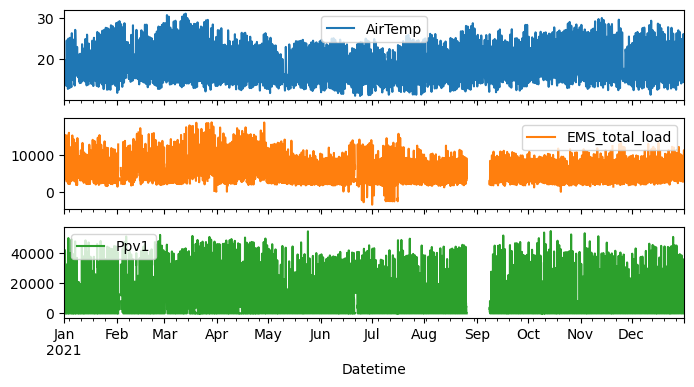

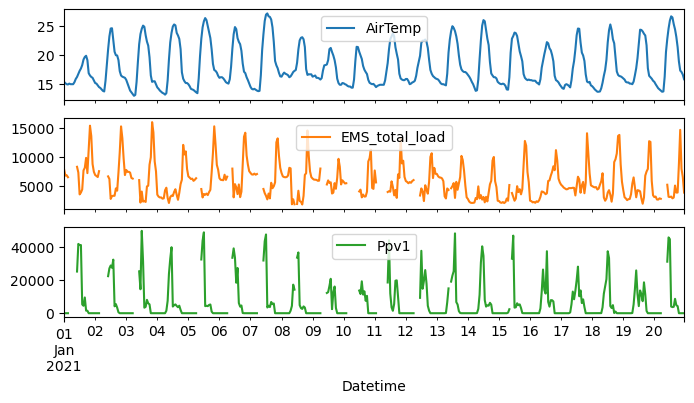

In [23]:
plot_cols = ['AirTemp',
             'EMS_total_load',
             'Ppv1']

# 1 Year
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True, figsize=(8, 4))

# First 20 Days
plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True, figsize=(8, 4))

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AirTemp,8760.0,18.059161,4.156686,11.20,14.800,16.50,21.250000,31.00
Azimuth,8760.0,-0.055080,95.638908,-175.00,-89.000,-0.25,89.000000,175.00
CloudOpacity,8760.0,42.928910,30.850100,0.00,15.050,41.25,68.800000,97.00
DewpointTemp,8760.0,12.706107,2.078866,2.55,11.550,13.00,14.100000,18.30
Dhi,8760.0,109.166724,161.321961,0.00,0.000,2.50,164.000000,684.00
Dni,8760.0,153.344749,297.603455,0.00,0.000,0.00,101.000000,1073.00
Ebh,8760.0,117.576941,242.837856,0.00,0.000,0.00,52.125000,1055.50
Ghi,8760.0,226.741895,325.797354,0.00,0.000,3.00,438.750000,1136.50
GtiFixedTilt,8760.0,226.764612,325.801554,0.00,0.000,2.75,437.875000,1135.50
GtiTracking,8760.0,260.054795,368.605360,0.00,0.000,2.50,531.000000,1139.00


## Impute Missing Data

As seen in the above plots, the electrical data contains lots of missing values. In order to make the dataset useable for a neural network, we need to fill these missing values. One way of doing this is by `imputation`.

In [17]:
df.isnull().sum() # Count the number of missing values in each column of the DataFrame

Date                   0
Time                   0
AirTemp                0
Azimuth                0
CloudOpacity           0
DewpointTemp           0
Dhi                    0
Dni                    0
Ebh                    0
Ghi                    0
GtiFixedTilt           0
GtiTracking            0
PrecipitableWater      0
RelativeHumidity       0
SurfacePressure        0
Zenith                 0
AlbedoDaily            0
Ppv1                 781
PrealL1              781
PrealL2              781
PrealL3              781
EMS_total_load       781
Datetime               0
dtype: int64

### Linear Interpolation

We can do basic linear interpolation using the .interpolate() method.

In [21]:
linear_interpolation = df[df.columns.drop(['Date', 'Time', 'Datetime'])].copy().interpolate(method='linear')

We can observe the effect that this has on the data below.

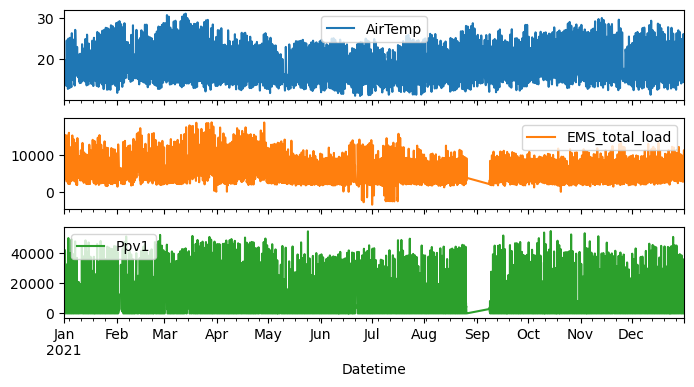

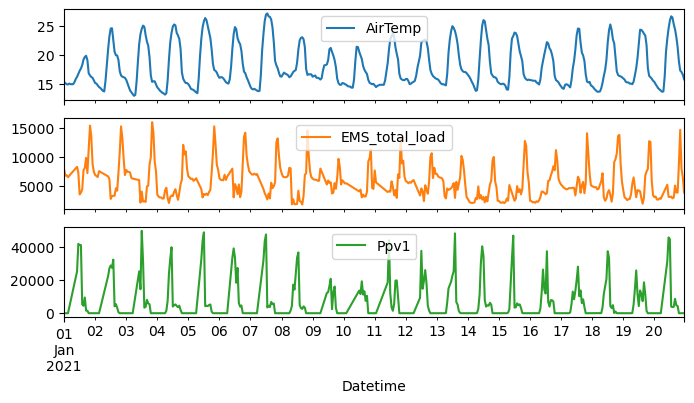

In [22]:
plot_features = linear_interpolation[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True, figsize=(8, 4))

plot_features = linear_interpolation[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True, figsize=(8, 4))

Linear interpolation draws a straight line between the two data points that bridge the missing data gap. This is fine, but we can do better!

### Imputation with Multivariate Imputation by Chained Equation (MICE)

In [29]:
# Imputing with MICE using sklearn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

df_mice = pd.DataFrame(mice_imputer.fit_transform(df[df.columns.drop(['Date', 'Time', 'Datetime'])].copy()), 
                       columns = df[df.columns.drop(['Date', 'Time', 'Datetime'])].copy().columns)

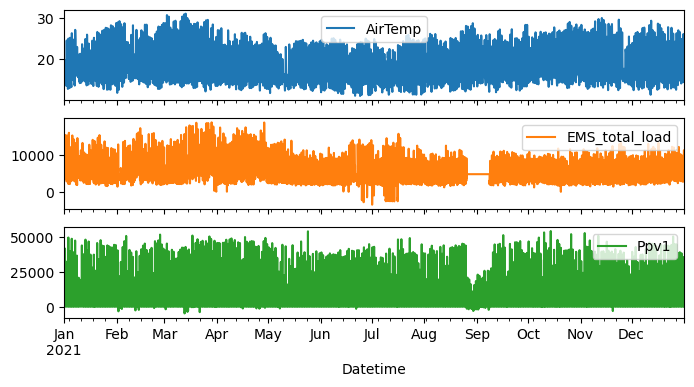

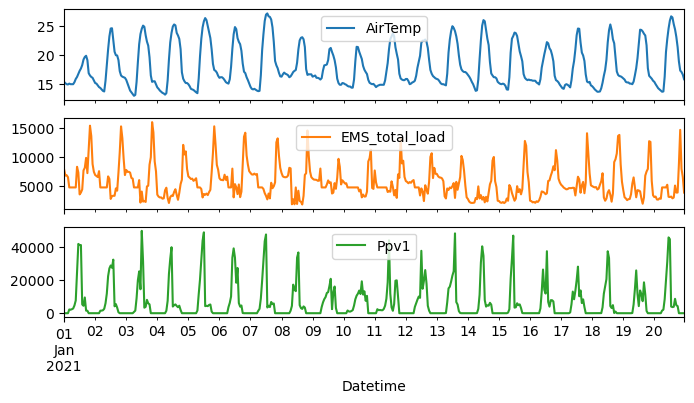

In [30]:
plot_features = df_mice[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True, figsize=(8, 4))

plot_features = df_mice[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True, figsize=(8, 4))

`MICE` results in much smoother interpolation compared to the linear method.

In [26]:
df_mice.isnull().sum() # Check whether there are still any missing values

AirTemp              0
Azimuth              0
CloudOpacity         0
DewpointTemp         0
Dhi                  0
Dni                  0
Ebh                  0
Ghi                  0
GtiFixedTilt         0
GtiTracking          0
PrecipitableWater    0
RelativeHumidity     0
SurfacePressure      0
Zenith               0
AlbedoDaily          0
Ppv1                 0
PrealL1              0
PrealL2              0
PrealL3              0
EMS_total_load       0
dtype: int64

## Create Time Features

In [28]:
timestamp_s = date_time.map(pd.Timestamp.timestamp) # Convert date_time into seconds.
timestamp_s

0       1.609459e+09
1       1.609463e+09
2       1.609466e+09
3       1.609470e+09
4       1.609474e+09
            ...     
8755    1.640977e+09
8756    1.640981e+09
8757    1.640984e+09
8758    1.640988e+09
8759    1.640992e+09
Name: Datetime, Length: 8760, dtype: float64

To capture the periodicity of the data, we will describe the time of day, week and year in a sinusoidal manner.

In [31]:
day = 24*60*60
week = (7)*day
year = (365.2425)*day

df_mice['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df_mice['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df_mice['Week sin'] = np.sin(timestamp_s * (2 * np.pi / week))
df_mice['Week cos'] = np.cos(timestamp_s * (2 * np.pi / week))
df_mice['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df_mice['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

### Plot time of day signal

Text(0.5, 1.0, 'Time of day signal')

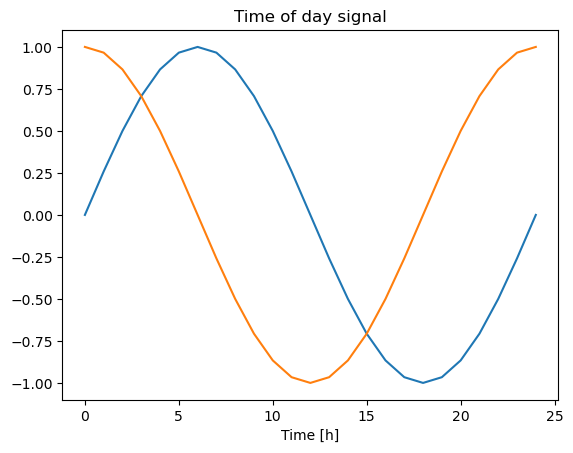

In [32]:
plt.plot(np.array(df_mice['Day sin'])[:25])
plt.plot(np.array(df_mice['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

### Plot time of week signal

Text(0.5, 1.0, 'Time of week signal')

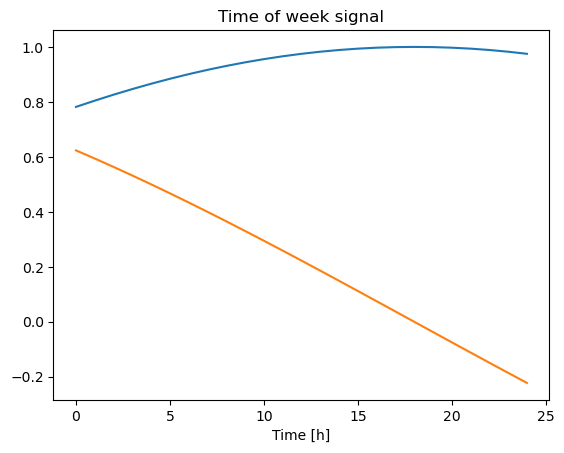

In [34]:
plt.plot(np.array(df_mice['Week sin'])[:25])
plt.plot(np.array(df_mice['Week cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of week signal')

If you didn't know which frequencies were important, you could use an `FFT` to identify them.

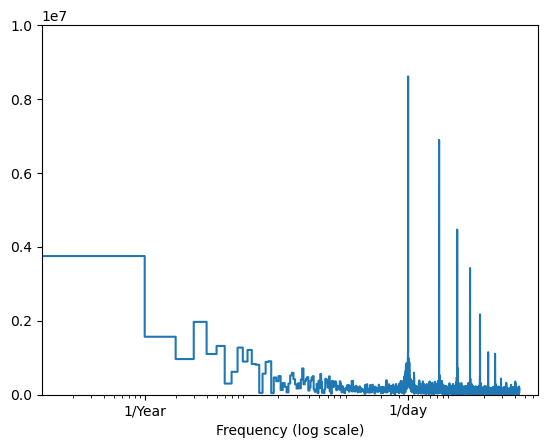

In [37]:
fft = tf.signal.rfft(df_mice['EMS_total_load']) # Using tensorflow (tf)
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df_mice['EMS_total_load'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 10000000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

## Dealing with Angles

`Zenith` and `Azimuth` are measured in degrees. Lets convert them to values between -1 and 1 using Sin.

In [39]:
df_mice['SinZenith'] = np.sin(df_mice.Zenith)
df_mice['SinAzimuth'] = np.sin(df_mice.Azimuth)

## Save as a .csv

In [41]:
df_mice.to_csv('../data/imputed_data.csv', index=False)